## Select The Right Threshold Values using ROC Curve

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# roc curve and auc curve
from sklearn.datasets import make_classification

In [5]:
from sklearn.model_selection import train_test_split
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1,1], random_state=1)

In [6]:
X.shape

(2000, 20)

In [7]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=1)

In [9]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### Random Forest

In [10]:

## Apply RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 1.0
RF test roc-auc: 0.9841222222222222


In [11]:
ytrain_pred

array([[1.  , 0.  ],
       [0.98, 0.02],
       [0.01, 0.99],
       ...,
       [0.96, 0.04],
       [0.99, 0.01],
       [0.26, 0.74]])

### Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.9863568922694498
Logistic test roc-auc: 0.9885777777777777


### Adaboost Classifier

In [13]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.9975081174960356
Adaboost test roc-auc: 0.9826111111111111


### KNN Classifier

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.981670071491109
Adaboost test roc-auc: 0.9426111111111111


### Now we will focus on selecting the best threshold for maximum accuracy

In [15]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.9852111111111111


In [17]:
pred

[0      0.98
 1      0.03
 2      0.95
 3      0.94
 4      0.56
 5      0.17
 6      0.94
 7      0.94
 8      0.97
 9      0.68
 10     0.89
 11     0.86
 12     0.05
 13     0.88
 14     0.96
 15     0.09
 16     0.00
 17     0.00
 18     0.01
 19     0.05
 20     0.96
 21     0.60
 22     0.83
 23     0.94
 24     0.01
 25     1.00
 26     0.06
 27     0.93
 28     0.78
 29     0.27
        ... 
 570    0.97
 571    0.01
 572    1.00
 573    0.15
 574    0.02
 575    0.96
 576    0.04
 577    0.01
 578    0.19
 579    0.00
 580    0.63
 581    0.04
 582    0.03
 583    0.00
 584    0.29
 585    0.96
 586    0.01
 587    0.95
 588    0.04
 589    0.17
 590    0.56
 591    0.02
 592    0.00
 593    0.01
 594    0.03
 595    0.02
 596    0.00
 597    0.99
 598    0.00
 599    1.00
 Length: 600, dtype: float64, 0      0.991861
 1      0.000008
 2      0.966929
 3      0.761539
 4      0.779443
 5      0.544222
 6      0.977857
 7      0.960771
 8      0.993640
 9      0.505748
 10     

In [16]:
pd.concat(pred, axis=1)

,0,1,2,3
0,0.98,0.991861,0.559186,1.0
1,0.03,0.000008,0.463282,0.0
2,0.95,0.966929,0.538202,0.8
3,0.94,0.761539,0.509875,0.8
4,0.56,0.779443,0.490344,0.4
5,0.17,0.544222,0.492548,0.6
6,0.94,0.977857,0.537171,1.0
7,0.94,0.960771,0.552570,0.8
8,0.97,0.993640,0.537610,1.0
9,0.68,0.505748,0.510507,0.6


In [18]:
final_prediction

0      0.882762
1      0.123323
2      0.813783
3      0.752853
4      0.557447
5      0.451693
6      0.863757
7      0.813335
8      0.875312
9      0.574064
10     0.716437
11     0.698977
12     0.203484
13     0.826290
14     0.857536
15     0.140514
16     0.165078
17     0.117468
18     0.115590
19     0.130670
20     0.884314
21     0.568893
22     0.779852
23     0.795371
24     0.119929
25     0.831257
26     0.134014
27     0.740531
28     0.759798
29     0.432949
         ...   
570    0.879839
571    0.123533
572    0.765532
573    0.333603
574    0.115468
575    0.821394
576    0.194165
577    0.118098
578    0.412643
579    0.114125
580    0.605504
581    0.178558
582    0.178754
583    0.115190
584    0.385687
585    0.854113
586    0.167087
587    0.896003
588    0.124644
589    0.272199
590    0.573643
591    0.171731
592    0.111018
593    0.218547
594    0.124466
595    0.126340
596    0.110345
597    0.876697
598    0.160717
599    0.837357
Length: 600, dtype: floa

In [21]:
### calculate ROC curve

fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91188114, 0.91188114, 0.90158893, 0.90077475, 0.80134271,
       0.79912833, 0.79702418, 0.7955558 , 0.78630736, 0.78571156,
       0.76374415, 0.76287124, 0.72701656, 0.72387362, 0.71845844,
       0.71643711, 0.6767442 , 0.66743537, 0.62707293, 0.60550386,
       0.5915152 , 0.57986186, 0.57396627, 0.57364346, 0.5696569 ,
       0.56889283, 0.54355932, 0.52877948, 0.52365858, 0.47616892,
       0.45169266, 0.38905357, 0.38629719, 0.34768074, 0.34586612,
       0.24401541, 0.24390421, 0.2269954 , 0.22646893, 0.20352808,
       0.20348417, 0.12325271, 0.1228351 , 0.10548439])

In [22]:
from sklearn.metrics import accuracy_score
accuracy_ls = []
for thres in thresholds:
    y_pred = np.where(final_prediction>thres,1,0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)],
                        axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)

In [23]:
accuracy_ls.head()

,thresholds,accuracy
30,0.451693,0.961667
29,0.476169,0.958333
27,0.528779,0.958333
26,0.543559,0.958333
28,0.523659,0.956667


In [24]:
accuracy_ls

,thresholds,accuracy
30,0.451693,0.961667
29,0.476169,0.958333
27,0.528779,0.958333
26,0.543559,0.958333
28,0.523659,0.956667
31,0.389054,0.950000
32,0.386297,0.948333
25,0.568893,0.948333
23,0.573643,0.948333
22,0.573966,0.946667


In [25]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

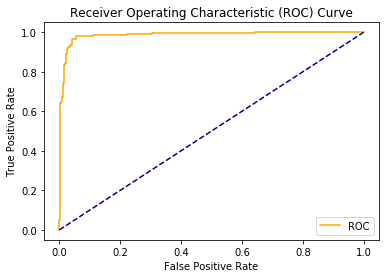

In [26]:
plot_roc_curve(fpr, tpr)